# Chapter XI: Digital Filter Design - Filtering Random Signals

## What is a Wiener Filter
A system that preserves as much information as possible by eliminating the interference based on stochastic properties.

**Wiener filter**: optimal system based on the root mean square error between the response of the filter and the desired signal.

![fig1](https://github.com/piero-latorre/DSP/blob/main/XI/image_0.png?raw=true)

Figure 1 shows a model based on a linear problem for estimation and prediction using Wiener Filter.

Is important to note that from this model:

Where:

* $x\left\lbrack n\right\rbrack$: input signal

* $w\left\lbrack n\right\rbrack$: interference (noise)

* $s\left\lbrack n\right\rbrack$: signal without noise

* $d\left\lbrack n\right\rbrack$: desired signal

* $e\left\lbrack n\right\rbrack$: difference between  $s[n]$ and  $x[n]$ (error)

Additionally, depending on the behaviour of $d[n]$ we have:

* if $d\left\lbrack n\right\rbrack =s\left\lbrack n\right\rbrack$ the problem is defined as **filtering** 
* if $d\left\lbrack n\right\rbrack =s\left\lbrack n+D\right\rbrack ,D>0$ the problem is defined as **prediction**
* if $d\left\lbrack n\right\rbrack =s\left\lbrack n-D\right\rbrack ,D>0$ the problem is defined as **smoothing**


## What are the initial conditions for Wiener Filtering?
* $s\left\lbrack n\right\rbrack$, $w\left\lbrack n\right\rbrack$, $d\left\lbrack n\right\rbrack$ have a mean of zero and are WSS 
* $s\left\lbrack n\right\rbrack$, $w\left\lbrack n\right\rbrack$ are uncorrelated signals to each other 
* $w\left\lbrack n\right\rbrack$ corresponds to a white noise $w=N\left(0,\sigma_w^2 \right)$.

$$\gamma_{ww}(l)=E\{ w[n]w[n-l] \} = \begin{cases} \sigma^2_w,\quad l=0\\0,\quad \text{otherwise} \end{cases}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w = np.random.normal(0, np.sqrt(1), size=1000)


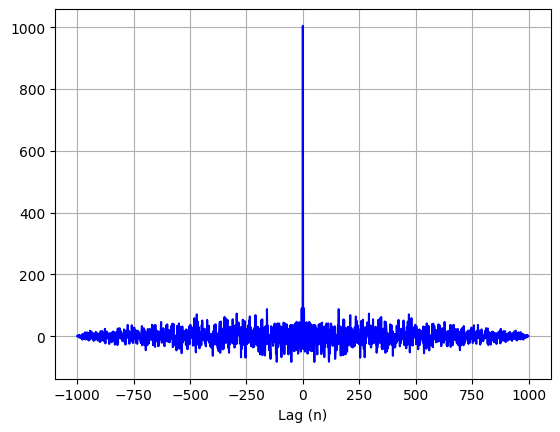

In [ ]:
g, lag = np.correlate(w, w, mode='full'), np.arange(-(len(w)-1), len(w))
plt.figure(1)
plt.plot(lag, g, 'b')
plt.xlabel('Lag (n)')
plt.grid(True)

## How can we design a FIR Wiener Filter?
**Strategy**: an optimal filter (impulse response $h[n]$) is designed to minimize the root mean square.

**Motivation**: the root mean square corresponds to a convex function, hence, it has a global minimum that can be easily calculated from the derivative.

* Response of the FIR filter (order P):
$$y[n]=\sum_{k=0}^{P-1} h[k]x[n-k]$$

* Root mean square:
$$\epsilon =E\lbrace |e[n]|^2 \rbrace =E\lbrace |d[n]-y[n]|^2 \rbrace$$

* Finally, the coefficients of the optimal filters are:
$$h_{opt} =\arg_h (\min (\epsilon ))$$


#### Finding the root mean square

$$\epsilon =E\left\lbrace {\left|d[n]-\sum_{k=0}^{P-1} h[k]x[n-k]\right|}^2 \right\rbrace$$
![figure2](https://github.com/piero-latorre/DSP/blob/main/XI/image_1.png?raw=true)

Exercise 1

Following the system from Figure 2.

![figure3](https://github.com/piero-latorre/DSP/blob/main/XI/image_2.png?raw=true)

Figure 2. Prediction of Wiener Filter.

Considering:

*  $u\left\lbrack n\right\rbrack$ is WSS with mean value $0$
* $\displaystyle \gamma_{\textrm{uu}} \left\lbrack l\right\rbrack =0\ldotp 5^{|l|}$


Design the Wiener filtering considering an order of P=2 and find the $\epsilon$.

## What is an Adaptive Filter?

![figure4](https://github.com/piero-latorre/DSP/blob/main/XI/image_3.png?raw=true)

Figure 3. Adaptive algorithm.

**Adaptive algorithm**: it is a set of rules that define how the coefficients of the filter can be corrected.

Requirements:

* In the infinite, the solution has to be an approximation of the Wiener-Hopf equations.

* It is not necessary to know the statistics to calculate $\Delta h$.

* For not WSS, the filter must be adapted to change the statistics and follow the solution in time.

***Important***: it is necessary to know the desired signal or any result that allows us to measure the error in order to quantify the performance of the filter.

Least Mean Square algorithm:

* Time invariant filter: $h\left\lbrack k,n+1\right\rbrack =h\left\lbrack k,n\right\rbrack -\frac{1}{2}\mu \;\nabla \;k\left(n\right)$
* In vectorial form: $h\left\lbrack n+1\right\rbrack =h\left\lbrack n\right\rbrack -\frac{1}{2}\mu \nabla \left(n\right)$
* Criteria to minimize: $\textrm{MSE}$: $\epsilon =E\left\lbrace e^2 \left\lbrack n\right\rbrack \right\rbrace$
 

where:

![figure5](https://github.com/piero-latorre/DSP/blob/main/XI/image_4.png?raw=true)

![figure6](https://github.com/piero-latorre/DSP/blob/main/XI/image_5.png?raw=true)

Infinite samples:

![figure7](https://github.com/piero-latorre/DSP/blob/main/XI/image_6.png?raw=true)

Finally, the algorithm is reduced to:

![figure6](https://github.com/piero-latorre/DSP/blob/main/XI/image_7.png?raw=true)

Where the stop-criteria could be any of the following:

* Number of iterations
* $\displaystyle e\left\lbrack n\right\rbrack <\tau$
* $\displaystyle |h_n -h_{n+1} |<\tau$ 

For jointly WSS process, the convergence is in the mean if:

$$0<\mu <\frac{2}{\textrm{total}\;\textrm{power}\;\textrm{of}\;\textrm{the}\;\textrm{input}}$$

Total power of the input: the sum of the mean square values if WSS:

*$\mu$ too small $\epsilon_{\textrm{found}}$ close to $\epsilon_{\min }$ a lot of iterations (slow) 
* $\mu$ too big: quick, $\epsilon_{\textrm{found}}$ \end{flushleft}}
 

Exercise 2

Considering a process: $x\left\lbrack n\right\rbrack =1\ldotp 2728x\left\lbrack n-1\right\rbrack -0\ldotp 81x\left\lbrack n-2\right\rbrack +v\left\lbrack n\right\rbrack$ where $v\left\lbrack n\right\rbrack$ is a unit variance with noise. Apply the adaptive linear prediction using LMS algorithm.

$$\hat{x} [n]=1.2728x[n-1]-0.81x[n-2]$$

Suppose we consider an adaptive linear predictor:

$$\hat{x} =h_n [1]x[n-1]-h_n [2]x[n-2]$$

with LMS algorithm

$$h_{n+1} =h_n [k]+\mu e[n]x[n-k]$$

If $\mu$ is sufficiently small, then the coefficients will converge in the mean to their optimum values:

$$e[n]=x[n]-\hat{x} [n]=[1.2728-h_n [1]]x[n-1]+[-0.81-h_n [2]]x[n-2]+v[n]$$

Therefore:

$$\begin{array}{l}
h_n [1]=1.2728\\
h_n [2]=-0.81
\end{array}$$

And the minimum MSE: $\epsilon_{\min } =\sigma_2^2 =1$. To perform the algorithm, suppose that the weight vector is initialized to zero $h_n =0$ and the step size is defined by two test: $\mu =0\ldotp 02$ and $\mu =0\ldotp 004$.

![figure7](https://github.com/piero-latorre/DSP/blob/main/XI/image_8.png?raw=true)


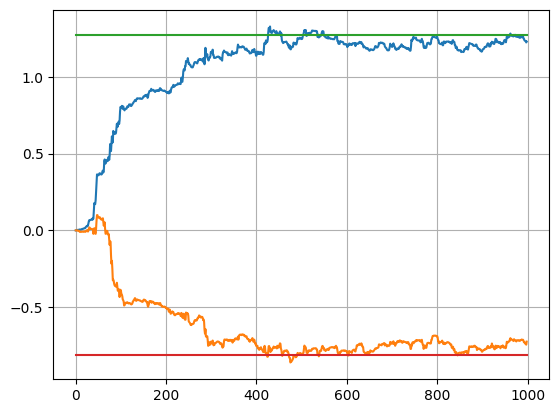

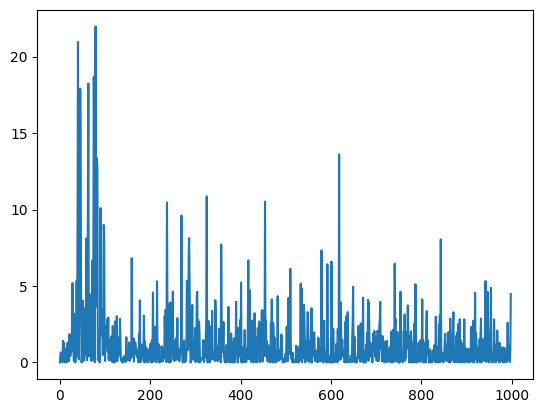

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# Number of experiments
N = 1000

# Noise vector
g = np.random.randn(N)

# Filter coefficients
a = [1, -1.27, 0.81]
x = lfilter([1], a, g)

# Parameters
mu = 0.004
h = np.zeros(2)
er = np.zeros(N-1)

# Filter coefficients
h1 = np.zeros(N-1)
h2 = np.zeros(N-1)

# Loop
for i in range(1, N-1):
    # Algorithm
    d_est = h[0] * x[i] + h[1] * x[i-1]
    e = x[i+1] - d_est
    h[0] = h[0] + mu * e * x[i]
    h[1] = h[1] + mu * e * x[i-1]

    # Coefficients updating
    h1[i] = h[0]
    h2[i] = h[1]
    er[i] = e

# Plot
plt.figure()
plt.plot(np.array([h1, h2]).T)
plt.plot(np.ones(N-1) * 1.27)
plt.plot(np.ones(N-1) * -0.81)
plt.grid(True)

plt.figure(2)
plt.plot(er**2)

% Plot

